# Manufacturing and Distribution Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

ModuleNotFoundError: No module named 'numpy'

### Problem statement

A factory makes two cars GlossyCar and ShinyCar. The profits from selling one GlossyCar is `$`30,000 and from selling one ShinyCar is `$`45,000. The company wants to maximize the profits that it makes on the production of these two cars.

Each of these cars have manufacturing processes that are run on 3 different manufacturing plants. Plant A, Plant B, and plant C.

- GlossyCar need to be processed in Plant A for 3 hours, Plant B for 7 hours and Plant C for 3 hours
- ShinyCar need to be processed in Plant A for 4 hours, Plant B for 6 hours and Plant C for 6 hours

- Plant A has a total capacity of a 30 processing hours per week
- Plant B has a total capacity of a 60 processing hours per week
- Plant C has a total capacity of a 42 processing hours per week

**Maximize**

Z = 30000x + 45000y

**Constraints**

3x + 4y <= 30

7x + 6y <= 60

3x + 6y <= 42 

where x and y should be integers

### Let's solve it graphically as though it is an LP problem, i.e. LP relaxation

In [142]:
x_i = np.array(list(range(0, 1000, 1)))

In [143]:
y_1 = (30 - (3 * x_i)) / 4

y_2 = (60 - (7 * x_i)) / 6

y_3 = (42 - (3 * x_i)) / 6

y_4 = np.minimum(y_2, y_3)

y_5 = np.minimum(y_1, y_4)

### Graphical Solution

By luck, the corner point which gives us the optimal solution is an integer point so we can accept the final solution as this integer.

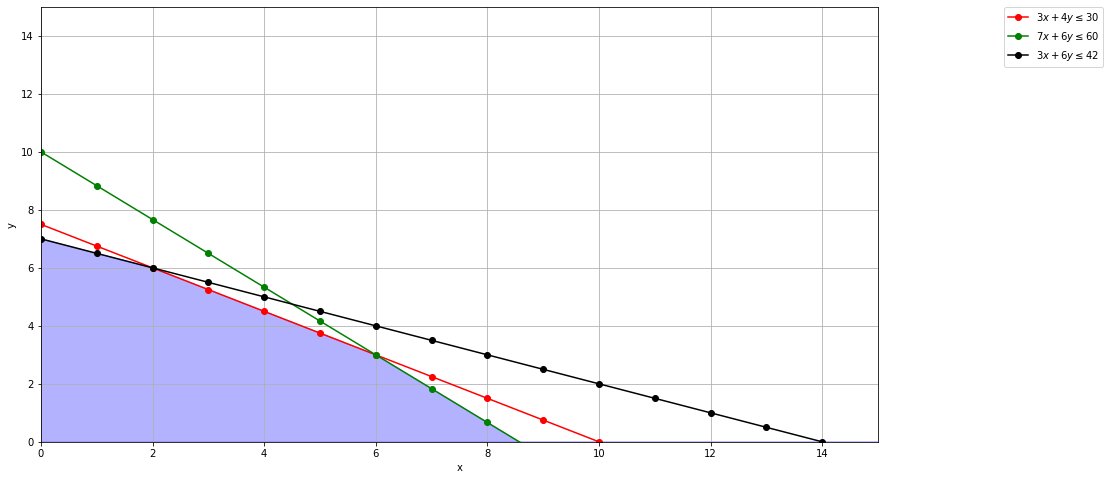

In [144]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, 'o-', color = 'red', label=r'$3x + 4y\leq30$')
plt.plot(x_i, y_2, 'o-', color = 'green', label=r'$7x + 6y\leq60$')
plt.plot(x_i, y_3, 'o-', color = 'black', label=r'$3x + 6y\leq42$')

plt.grid()
plt.xlim((0, 15))
plt.ylim((0, 15))
plt.xlabel('x')
plt.ylabel('y')

plt.fill_between(x_i, y_5, color = 'blue', alpha = 0.30, interpolate = True)

plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0)

plt.show()

### Pick coordinates to test for the optimal solution. 

Some coordinates are integral values and others are continuous values

**It so happens that the optimal solution of this LP are integral values of x and y**

In [146]:
corner_points = [(8.57, 0), (6, 3), (2, 6), (0, 7)] 

for x, y in corner_points:
    print(f"At:{x, y}, max(z)= {30000*x + 45000*y}")

At:(8.57, 0), max(z)= 257100.0
At:(6, 3), max(z)= 315000
At:(2, 6), max(z)= 330000
At:(0, 7), max(z)= 315000


### Solution using Pulp

In [147]:
model = LpProblem('car-profit-maximizing', sense = LpMaximize)

model

car-profit-maximizing:
MAXIMIZE
None
VARIABLES

In [148]:
x = LpVariable('x', lowBound=0, cat = 'Integer')

y = LpVariable('y', lowBound=0, cat = 'Integer')

In [149]:
model += (30000*x + 45000*y, 'profit')

model

car-profit-maximizing:
MAXIMIZE
30000*x + 45000*y + 0
VARIABLES
0 <= x Integer
0 <= y Integer

In [150]:
model += (3*x + 4*y <= 30, "Plant A")
model += (7*x + 6*y <= 60, "Plant B")
model += (3*x + 6*y <= 42, "Plant C")

model

car-profit-maximizing:
MAXIMIZE
30000*x + 45000*y + 0
SUBJECT TO
Plant_A: 3 x + 4 y <= 30

Plant_B: 7 x + 6 y <= 60

Plant_C: 3 x + 6 y <= 42

VARIABLES
0 <= x Integer
0 <= y Integer

In [151]:
status = model.solve()
status

1

In [152]:
print(f'status:{model.status} meaning: {LpStatus[model.status]}')

status:1 meaning: Optimal


In [153]:
model.objective.value()

330000.0

In [154]:
for var in model.variables():
    print(f'{var.name} : {var.value()}')

x : 2.0
y : 6.0


## Manufacturing problem


### From NCERT

https://ncert.nic.in/ncerts/l/lemh206.pdf

A manufacturing company makes two models A and B of a product. Each piece of Model A requires 9 labour hours for fabricating and 1 labour hour for finishing. Each piece of Model B requires 12 labour hours for
fabricating and 3 labour hours for finishing. For fabricating and finishing, the maximum
labour hours available are 180 and 30 respectively. 

The company makes a profit of 8000 on each piece of model A and 12000 on each piece of Model B. How many
pieces of Model A and Model B should be manufactured per week to realise a maximum
profit? What is the maximum profit per week? [link](https://ncert.nic.in/ncerts/l/lemh206.pdf)


#### Solution:

Suppose x is the number of pieces of Model A and y is the number of pieces
of Model B. Then

Total profit = 8000x + 12000y

Let Z = 8000x + 12000y

We now have the following mathematical model for the given problem.

### Maximize

Z = 8000 x + 12000 y 

### subject to the constraints:

9x + 12y ≤ 180 (Fabricating constraint)

i.e. 3x + 4y ≤ 60 

x + 3y ≤ 30 (Finishing constraint) 

x >= 0, y >= 0, must be integer because number of product will integer not in fraction.

In [155]:
# z = 8000x + 12000y

# 9x + 12y <=180

# x + 3y <= 30

In [156]:
x_i = np.array(range(0, 1000, 1))

In [157]:
y_1 = (180 - 9*x_i) / 12

y_2 = (30 - x_i) / 3

y_3 = np.minimum(y_1, y_2)

### Graphical Solution

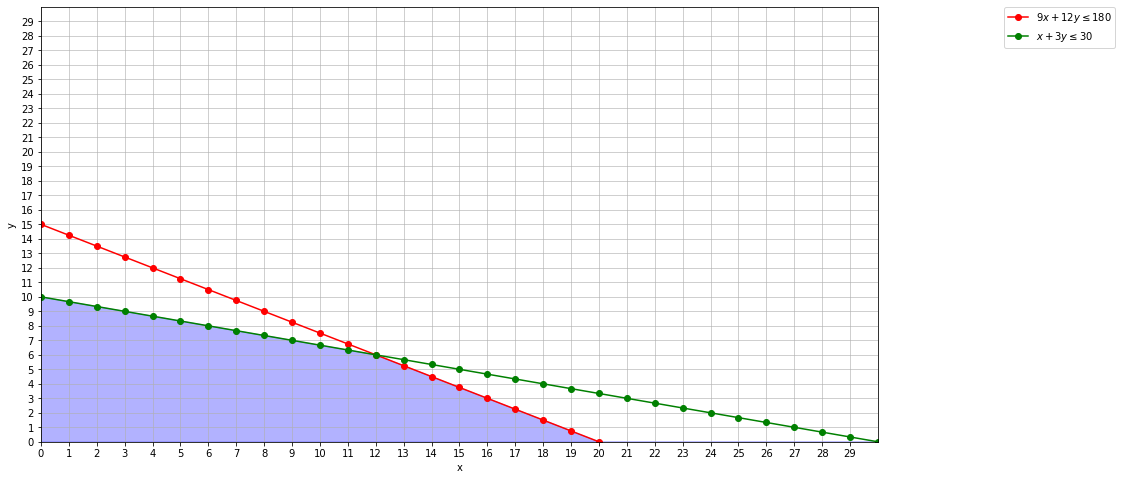

In [158]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, 'o-', color = 'red',label=r'$9x +12y\leq180$')
plt.plot(x_i, y_2, 'o-', color = 'green', label=r'$x+3y\leq30$', alpha = 1)

plt.fill_between(x_i, y_3, color = 'blue', alpha = 0.30)

major_ticks = np.arange(0, 30, 5)
minor_ticks = np.arange(0, 30, 1)
plt.xticks(major_ticks)
plt.xticks(minor_ticks)

plt.yticks(major_ticks)
plt.yticks(minor_ticks)

plt.grid(which = 'both')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.75)

plt.xlim((0, 30))
plt.ylim((0, 30))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0)
plt.show()

### Pick integer points (coordinates) for optimal solution

You'll get optimal solution at (12, 6) in below. This is only an approximation, you may or may not get the right answer using this, in our case we happen upon the right solution

In [159]:
edge_coordinates = [(20, 0), (16, 3), (12, 6), (9, 7), (6, 8), (3, 9), (0, 10)] 

for x, y in edge_coordinates:
    print(f"At:{x, y}, max(z)= {8000*x+12000*y}")

At:(20, 0), max(z)= 160000
At:(16, 3), max(z)= 164000
At:(12, 6), max(z)= 168000
At:(9, 7), max(z)= 156000
At:(6, 8), max(z)= 144000
At:(3, 9), max(z)= 132000
At:(0, 10), max(z)= 120000


### Solution using PuLp

In [160]:
model = LpProblem('profit-maximizing', sense = LpMaximize)

model

profit-maximizing:
MAXIMIZE
None
VARIABLES

In [161]:
x = LpVariable('x', lowBound=0, cat = 'Integer')

y = LpVariable('y', lowBound=0, cat = 'Integer')

In [162]:
model += 8000*x + 12000*y, 'profit'

model += (9*x + 12*y <= 180, 'Fabricating constraint')
model += (x + 3*y <=30, 'Finishing constraint')

model

profit-maximizing:
MAXIMIZE
8000*x + 12000*y + 0
SUBJECT TO
Fabricating_constraint: 9 x + 12 y <= 180

Finishing_constraint: x + 3 y <= 30

VARIABLES
0 <= x Integer
0 <= y Integer

In [163]:
status = model.solve()

print(f'status:{model.status} meaning: {LpStatus[model.status]}')

status:1 meaning: Optimal


In [164]:
model.objective.value()

168000.0

In [165]:
for var in model.variables():
    print(f'{var.name} : {var.value()}')

x : 12.0
y : 6.0


### Capital budgeting problem

There are four possible projects, which each run for 3 years and have the following characteristics.

- Project 1 with capital requirements for year 1 = 0.5m, year 2 = 0.3m, year 3 = 0.2m. Returns 2
- Project 2 with capital requirements for year 1 = 1m, year 2 = 0.8m, year 3 = 0.2m. Returns 3
- Project 3 with capital requirements for year 1 = 1.5m, year 2 = 1.5m, year 3 = 0.3m. Returns 5
- Project 4 with capital requirements for year 1 = 0.1m, year 2 = 0.4m, year 3 = 0.1m. Returns 1


- Total available capital for each of the years year 1 = 3.1m, year 2 = 2.5m, year 3 = 0.4m

                         Capital requirements ($m)
Project   Return (£m)    Year   1     2     3
1         2                   0.5   0.3   0.2
2         3                   1.0   0.8   0.2
3         5                   1.5   1.5   0.3
4         1                   0.1   0.4   0.1
Available capital (£m)          3.1   2.5   0.4


We have a decision problem here: Which projects would you choose in order to maximise the total return?

**Maximize**

0.2x1 + 0.3x2 + 0.5x3 + 0.1x4

**Variables**

- the positive decision (do something) being represented by the value 1; and
- the negative decision (do nothing) being represented by the value 0.

**Constraints**

0.5x1 + 1.0x2 + 1.5x3 + 0.1x4 <= 3.1 (year 1)

0.3x1 + 0.8x2 + 1.5x3 + 0.4x4 <= 2.5 (year 2)

0.2x1 + 0.2x2 + 0.3x3 + 0.1x4 <= 0.4 (year 3)



In [166]:
model = LpProblem('profit-maximizing', sense = LpMaximize)

model

profit-maximizing:
MAXIMIZE
None
VARIABLES

In [167]:
x_1 = LpVariable('x_1', lowBound=0, upBound=1, cat="Integer")

x_2 = LpVariable('x_2', lowBound=0, upBound=1, cat="Integer")

x_3 = LpVariable('x_3', lowBound=0, upBound=1, cat="Integer")

x_4 = LpVariable('x_4', lowBound=0, upBound=1, cat="Integer")

In [168]:
model += (2*x_1 + 3*x_2 + 5*x_3 + 1*x_4, 'lifetime profit')

model += (0.5*x_1 + 1.0*x_2 + 1.5*x_3 + 0.1*x_4 <= 3.1, 'year 1')
model += (0.3*x_1 + 0.8*x_2 + 1.5*x_3 + 0.4*x_4 <= 2.5, 'year 2')
model += (0.2*x_1 + 0.2*x_2 + 0.3*x_3 + 0.1*x_4 <= 0.4, 'year 3')

model

profit-maximizing:
MAXIMIZE
2*x_1 + 3*x_2 + 5*x_3 + 1*x_4 + 0
SUBJECT TO
year_1: 0.5 x_1 + x_2 + 1.5 x_3 + 0.1 x_4 <= 3.1

year_2: 0.3 x_1 + 0.8 x_2 + 1.5 x_3 + 0.4 x_4 <= 2.5

year_3: 0.2 x_1 + 0.2 x_2 + 0.3 x_3 + 0.1 x_4 <= 0.4

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer

In [169]:
status = model.solve()

print(f'status:{model.status} meaning: {LpStatus[model.status]}')

status:1 meaning: Optimal


In [170]:
model.objective.value()

6.0

In [171]:
for var in model.variables():
    print(f'{var.name} : {var.value()}')

x_1 : 0.0
x_2 : 0.0
x_3 : 1.0
x_4 : 1.0


### Capital budgeting problem with extension

Suppose now that we have the additional condition that either project 1 or project 2 must be chosen (i.e. projects 1 and 2 are mutually exclusive)

This condition is an example of an either/or condition "either project 1 or project 2 must be chosen". In terms of the variables we have already defined this condition is "either x1 = 1 or x2 = 1". The standard trick for dealing with either/or conditions relating to two zero-one variables is to add to the IP the constraint

x1 + x2 = 1

In [172]:
model = LpProblem('profit-maximizing', sense = LpMaximize)

model

profit-maximizing:
MAXIMIZE
None
VARIABLES

In [173]:
x_1 = LpVariable('x_1', lowBound=0, upBound=1, cat="Integer")

x_2 = LpVariable('x_2', lowBound=0, upBound=1, cat="Integer")

x_3 = LpVariable('x_3', lowBound=0, upBound=1, cat="Integer")

x_4 = LpVariable('x_4', lowBound=0, upBound=1, cat="Integer")

In [174]:
model += (2*x_1 + 3*x_2 + 5*x_3 + 1*x_4, 'lifetime profit')

model += (0.5*x_1 + 1.0*x_2 + 1.5*x_3 + 0.1*x_4 <= 3.1, 'year 1')
model += (0.3*x_1 + 0.8*x_2 + 1.5*x_3 + 0.4*x_4 <= 2.5, 'year 2')
model += (0.2*x_1 + 0.2*x_2 + 0.3*x_3 + 0.1*x_4 <= 0.4, 'year 3')

model

profit-maximizing:
MAXIMIZE
2*x_1 + 3*x_2 + 5*x_3 + 1*x_4 + 0
SUBJECT TO
year_1: 0.5 x_1 + x_2 + 1.5 x_3 + 0.1 x_4 <= 3.1

year_2: 0.3 x_1 + 0.8 x_2 + 1.5 x_3 + 0.4 x_4 <= 2.5

year_3: 0.2 x_1 + 0.2 x_2 + 0.3 x_3 + 0.1 x_4 <= 0.4

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer

In [175]:
model += (x_1 + x_2 == 1, 'Either-1-or-2')

model

profit-maximizing:
MAXIMIZE
2*x_1 + 3*x_2 + 5*x_3 + 1*x_4 + 0
SUBJECT TO
year_1: 0.5 x_1 + x_2 + 1.5 x_3 + 0.1 x_4 <= 3.1

year_2: 0.3 x_1 + 0.8 x_2 + 1.5 x_3 + 0.4 x_4 <= 2.5

year_3: 0.2 x_1 + 0.2 x_2 + 0.3 x_3 + 0.1 x_4 <= 0.4

Either_1_or_2: x_1 + x_2 = 1

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer

In [176]:
status = model.solve()

print(f'status:{model.status} meaning: {LpStatus[model.status]}')

status:1 meaning: Optimal


In [177]:
model.objective.value()

4.0

In [178]:
for var in model.variables():
    print(f'{var.name} : {var.value()}')

x_1 : 0.0
x_2 : 1.0
x_3 : 0.0
x_4 : 1.0


### Manufacturing plants and Distribution facilities

Decisions:

- Build a manufacturing plant in Alberta (lifetime value 9m cost 6m)
- Build a manufacturing plant in British Columbia (lifetime value 6m cost 3m)
- Build a distribution facility in Alberta (lifetime value 9m cost 7m)
- Build a distribution facility in British Columbia (lifetime value 5m cost 4m)


- If the plant is in Alberta the distribution facility may or may not be in Alberta
- If the plant is in British Columbia the distribution facility may or may not be in British Columbia


- The distribution facility HAS to be in a location where the plant is present

In [179]:
# Maximizing
# z = 9x_1 + 6x_2 + 9x_3 + 5x_4

# 6x_1 + 3x_2 + 7x_3 + 4x_4 <= 13
# x_3 - x_1 <= 0
# x_4 - x_2 <= 0

# all x's are binary

In [180]:
model = LpProblem('lifetime-value-maximizing', sense = LpMaximize)

model

lifetime-value-maximizing:
MAXIMIZE
None
VARIABLES

In [181]:
x_1 = LpVariable('x_1', lowBound=0, upBound=1, cat="Integer")

x_2 = LpVariable('x_2', lowBound=0, upBound=1, cat="Integer")

x_3 = LpVariable('x_3', lowBound=0, upBound=1, cat="Integer")

x_4 = LpVariable('x_4', lowBound=0, upBound=1, cat="Integer")

In [182]:
model += (9*x_1 + 6*x_2 + 9*x_3 + 5*x_4, 'lifetime value')

model += 6*x_1 + 3*x_2 + 7*x_3 + 4*x_4 <= 13
model += x_3 - x_1 <= 0
model += x_4 - x_2 <= 0

model

lifetime-value-maximizing:
MAXIMIZE
9*x_1 + 6*x_2 + 9*x_3 + 5*x_4 + 0
SUBJECT TO
_C1: 6 x_1 + 3 x_2 + 7 x_3 + 4 x_4 <= 13

_C2: - x_1 + x_3 <= 0

_C3: - x_2 + x_4 <= 0

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer

In [183]:
status = model.solve()

print(f'status:{model.status} meaning: {LpStatus[model.status]}')

status:1 meaning: Optimal


In [184]:
model.objective.value()

20.0

In [185]:
for var in model.variables():
    print(f'{var.name} : {var.value()}')

x_1 : 1.0
x_2 : 1.0
x_3 : 0.0
x_4 : 1.0
